<a href="https://colab.research.google.com/github/Rajat-Sri/Capstone-3-Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular Risk Prediction**



##### **Project Type**    - Supervised Machine Learning(Classification Problem)
##### **Contribution**    - Individual
##### **Team Member**     - Rajat Srivastava

# **Project Summary -**

Busines problem

Assumption

Research questions

hypothesis

analysis and findings

conclusion/solutions/suggestions

# **GitHub Link -**

https://github.com/Rajat-Sri/Capstone-3-Cardiovascular-Risk-Prediction

# **Problem Statement**


The term “heart disease” is often used interchangeably with the term “cardiovascular disease”.Heart disease is one of the biggest causes of mortality among the population of the world. Prediction of cardiovascular disease is regarded as one of the most important subjects in the section of clinical data analysis.

There is an an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

We have been provided dataset with the goal of creating a classification model to predict whether the patient has a 10-year risk of future coronary heart disease (CHD) or not. 

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Importing important libraries and modules
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for handing imbalanced data
from imblearn.over_sampling import SMOTE

# for data splitting, transforming and model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# for model evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#to ignore warnings
import warnings    
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset

dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Capstone 3/data_cardiovascular_risk.csv')

### Dataset First View

In [4]:
# Dataset First Look

dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

dataset.shape

(3390, 17)

### Dataset Information

In [6]:
# Dataset Info

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

missing = dataset.columns[dataset.isnull().any()].tolist()

print('Missing dataset Count')
print(dataset[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing dataset Percentage')
print(round(dataset[missing].isnull().sum().sort_values(ascending = False)/len(dataset)*100,2))

Missing dataset Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------
Missing dataset Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


<Axes: >

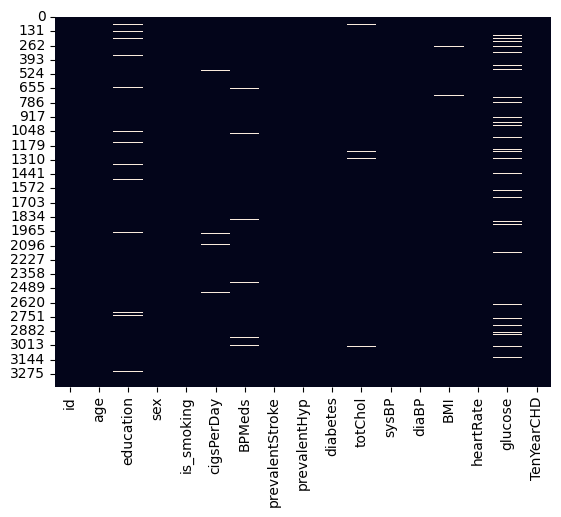

In [9]:
# Visualizing the missing values

# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

- Dataset contains 3390 rows and 17 columns.
- Dataset dose not contain any duplicate values.
- Dataset contains multiple columns with missing values.
- Missing dataset Count

 - glucose   -    304
 - education  -    87
 -  BPMeds    -     44
 - totChol    -    38
 - cigsPerDay  -   22
 - BMI         -   14
 - heartRate   -    1

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns

dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
# Dataset Describe

dataset.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

#### <b>Demographic:</b>
* ##### Sex: male or female("M" or "F")
* ##### Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

#### <b>Behavioral:</b>
* ##### is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* #####  Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

##### <b>Medical( history):</b>
* #####  BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* #####  Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* #####  Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* #####  Diabetes: whether or not the patient had diabetes (Nominal)

##### <b>Medical( current):</b>
* #####  Tot Chol: total cholesterol level (Continuous)
* #####  Sys BP: systolic blood pressure (Continuous)
* #####  Dia BP: diastolic blood pressure (Continuous)
* #####  BMI: Body Mass Index (Continuous)
* #####  Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)
* #####  Glucose: glucose level (Continuous)

##### <b>Predict variable (desired target):</b>
* #####  10-year risk of coronary heart disease CHD(1- Yes, 0-No)




### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  id is 3390 .
No. of unique values in  age is 39 .
No. of unique values in  education is 4 .
No. of unique values in  sex is 2 .
No. of unique values in  is_smoking is 2 .
No. of unique values in  cigsPerDay is 32 .
No. of unique values in  BPMeds is 2 .
No. of unique values in  prevalentStroke is 2 .
No. of unique values in  prevalentHyp is 2 .
No. of unique values in  diabetes is 2 .
No. of unique values in  totChol is 240 .
No. of unique values in  sysBP is 226 .
No. of unique values in  diaBP is 142 .
No. of unique values in  BMI is 1259 .
No. of unique values in  heartRate is 68 .
No. of unique values in  glucose is 132 .
No. of unique values in  TenYearCHD is 2 .


In [13]:
# Check Unique Values for each variable.

#creating a column list 
categorical_variables = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

#checking the unique values
for col in categorical_variables:
  print(f'Unique values for {col}: {dataset[col].unique()}')

Unique values for education: [ 2.  4.  1.  3. nan]
Unique values for sex: ['F' 'M']
Unique values for is_smoking: ['YES' 'NO']
Unique values for BPMeds: [ 0. nan  1.]
Unique values for prevalentStroke: [0 1]
Unique values for prevalentHyp: [0 1]
Unique values for diabetes: [0 1]
Unique values for TenYearCHD: [1 0]


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

# Create a copy of the current dataset and assigning to df
df=dataset.copy()

In [15]:
# Dropping the id column because it will just act like indexing
df.drop(columns=['id'], inplace=True)

In [16]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  df[col] = df[col].fillna(df[col].median())

In [17]:
# Now checking Nan values
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [18]:
# Changing datatype

df['education'] = df['education'].astype(int)
df['cigsPerDay'] = df['cigsPerDay'].astype(int)
df['BPMeds'] = df['BPMeds'].astype(int)
df['totChol'] = df['totChol'].astype(int)
df['sysBP'] = df['sysBP'].astype(int)
df['diaBP'] = df['diaBP'].astype(int)
df['heartRate'] = df['heartRate'].astype(int)
df['glucose'] = df['glucose'].astype(int)

In [19]:
# Checking dataset
df.head(10)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2,F,YES,3,0,0,0,0,221,148,85,25.38,90,80,1
1,36,4,M,NO,0,0,0,1,0,212,168,98,29.77,72,75,0
2,46,1,F,YES,10,0,0,0,0,250,116,71,20.35,88,94,0
3,50,1,M,YES,20,0,0,1,0,233,158,88,28.26,68,94,1
4,64,1,F,YES,30,0,0,0,0,241,136,85,26.42,70,77,0
5,61,3,F,NO,0,0,0,1,0,272,182,121,32.80,85,65,1
6,61,1,M,NO,0,0,0,1,0,238,232,136,24.83,75,79,0
7,36,4,M,YES,35,0,0,0,0,295,102,68,28.15,60,63,0
8,41,2,F,YES,20,0,0,0,0,220,126,78,20.70,86,79,0
9,55,2,F,NO,0,0,0,1,0,326,144,81,25.71,85,78,0


### What all manipulations have you done and insights you found?

**Manipulations**
 - Less than 10% overall data is missing,this is not major and can easily be handeled by replacing with median values, we used median values as it will not affect data skewness.
 - Data type format of variables are also incorrect which is corrected.

**Insights on dataset first view**

 - Healthy blood sugar level is between 100-125mg/dl.For now on analysing it is found that very few patients have high glucose levels.
 - Total chalestrol anything more than 200mg/dl is high, and from oour dataset it can concluded that most people have high chalestrol levels.
 - Healthy BMI ranges between 18.5-24.9, but most than 50% partients in dataset does not belong to thin group
 - Normal resting heart rate is between 60-100/min,very few people fall beyond this range.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [20]:
# Creating a copy of df for EDA
newdf = df.copy()

# Creating a copy of df for Data Modelling
ml_df = df.copy()

#### Chart - 1 - Count of people who are at risk of coronary heart disease

0    2879
1     511
Name: TenYearCHD, dtype: int64


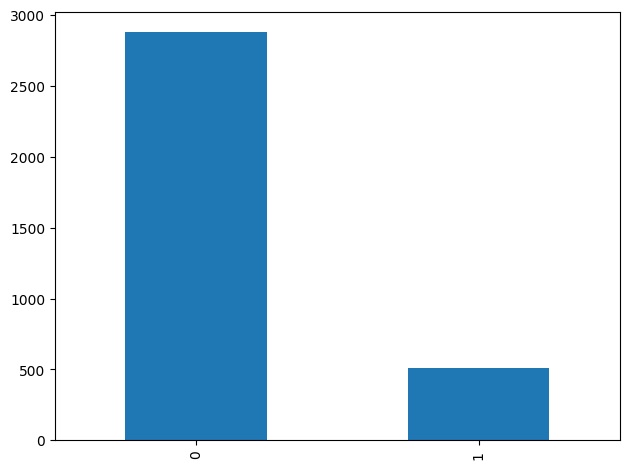

In [43]:
# Chart - 1 visualization code

#Count of each type
plot_1 = newdf['TenYearCHD'].value_counts()
print(plot_1)

#Visualizing using bar
plot_1.plot(kind='bar')
plt.show()

##### 1. Why did you pick the specific chart?

- Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

- Count of people with risk of coronary heart disease in next 10 years is 511 which makes 15% of the total dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- We got to know that 15% of the total people are prone to coronary heart diseses which is a significant number in terms of heathcare sector.
- We need to find reasons why such a huge population is prone to coronary heart diseases.Let take a more indepth look at out dataset to lnow more.

#### Chart - 2 - Does gender playes any role in increasing risk of coronary heart diseses?

  sex  TenYearCHD     0
0   F           0  1684
1   F           1   239
2   M           0  1195
3   M           1   272


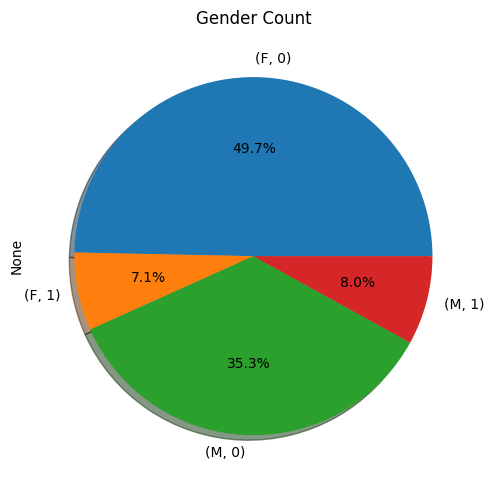

In [49]:
# Chart - 2 visualization code

# Analysing the distribution

plot_2 = newdf.groupby(['sex', 'TenYearCHD']).size().reset_index()
print(plot_2)

#Visualizing using pie chart
newdf.groupby(['sex', 'TenYearCHD']).size().plot.pie(title='Gender Count', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

- A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

- Ratio of men prone to coronary heart disese is higher compared to women.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- It seems like men are leading a more unhealthy lifestyle as compared to women.
- There can be various reasons for that like poor diet or smoking.We need to dig deep in that.

#### Chart - 3 - Ratio of men to women who are smoking.

sex  is_smoking
F    NO            1147
     YES            776
M    NO             556
     YES            911
dtype: int64


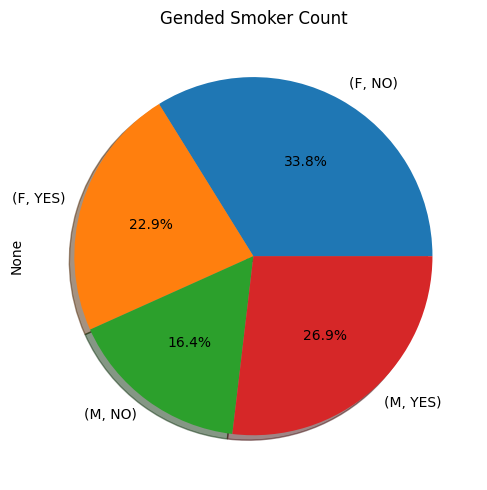

In [54]:
# Chart - 3 visualization code

# Analysing the distribution

plot_3 = newdf.groupby(['sex', 'is_smoking']).size()
print(plot_3)

#Visualizing using pie chart
plot_3.plot.pie(title='Gended Smoker Count', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

- A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

- It is quite clear that percentage of men who are smokers is comparetevely higher than women.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Though we can clearly see that as men are more prone to coronary heart diseases as they are more addicted to smoking compared to women.
- But we also need to check that is smoking is directly the cause of coronary hear diseases? 

#### Chart - 4 - Does smoking directly causes coronary hear diseses?

TenYearCHD  is_smoking
0           NO            1467
            YES           1412
1           NO             236
            YES            275
dtype: int64


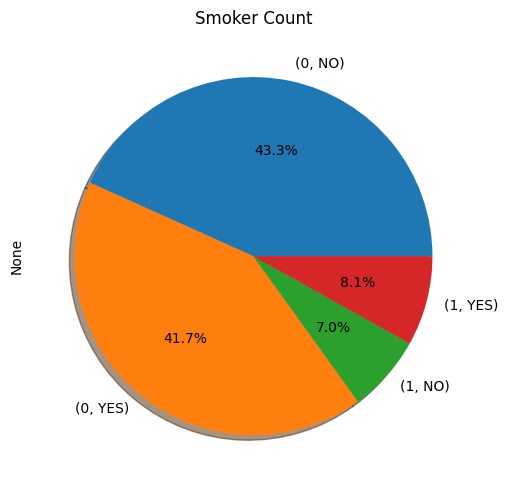

In [53]:
# Chart - 4 visualization code

# Analysing the distribution

plot_4 = newdf.groupby(['TenYearCHD', 'is_smoking']).size()
print(plot_4)

#Visualizing using pie chart
plot_4.plot.pie(title='Smoker Count', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

- A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

- We didn't find any direct relation between coronary heart disese and smoking.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Though ratio of men infected with coronary heart diseses is higher and they even smoke more comapred to women,but then also we were unable to find any direct relation between heart diseses and smoking.
- It seem smoking alone can't be the factor,it may be one of the adding factors.
Lets try to take in account other factors like amont of smoking per day as well.

#### Chart - 5 - Affect of smoking cigarette

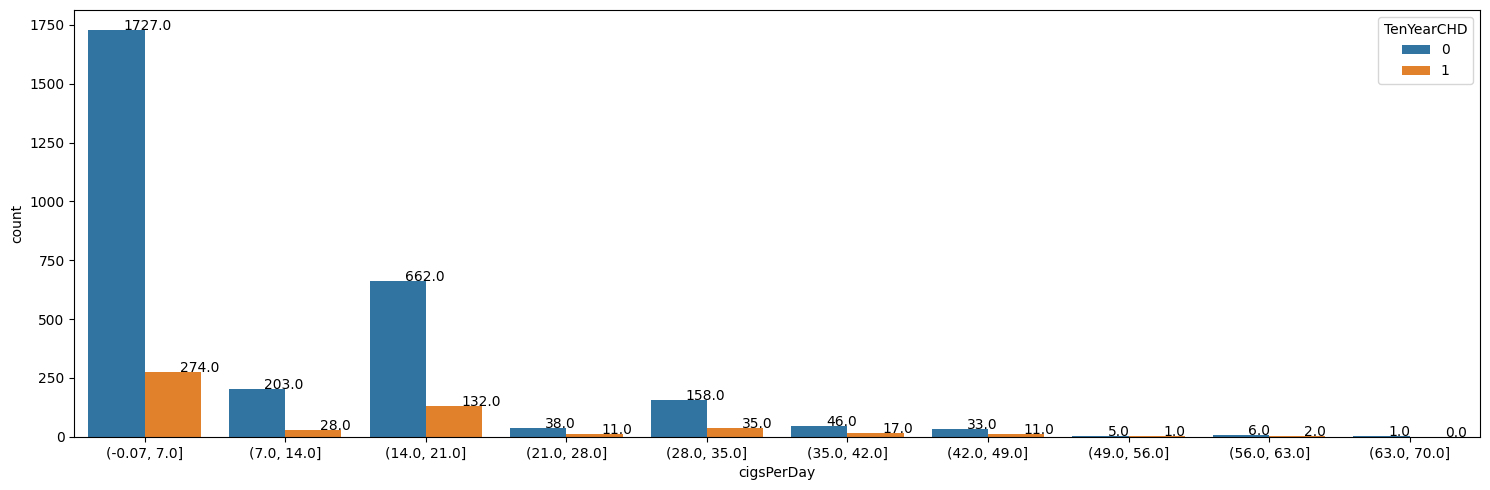

In [66]:
# Chart - 5 visualization code
# Analysing the dataset

f, plot_5 = plt.subplots(figsize=(15, 5))
plt.rcParams["figure.autolayout"] = True

plot_5 = sns.countplot(data=newdf, x=pd.cut(newdf['cigsPerDay'], 10), hue='TenYearCHD')

for p in plot_5.patches:
   plot_5.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

- Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

- Quantity of smoking is certainly directly related to coronary heart disese. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Though we had not found any direct relation of smoking with coronary heart disese,but quantity of smoaking certainly influences the increases chances of having coronary heart disease.

#### Chart - 6 - Affect of BMI over coronary heart disese.

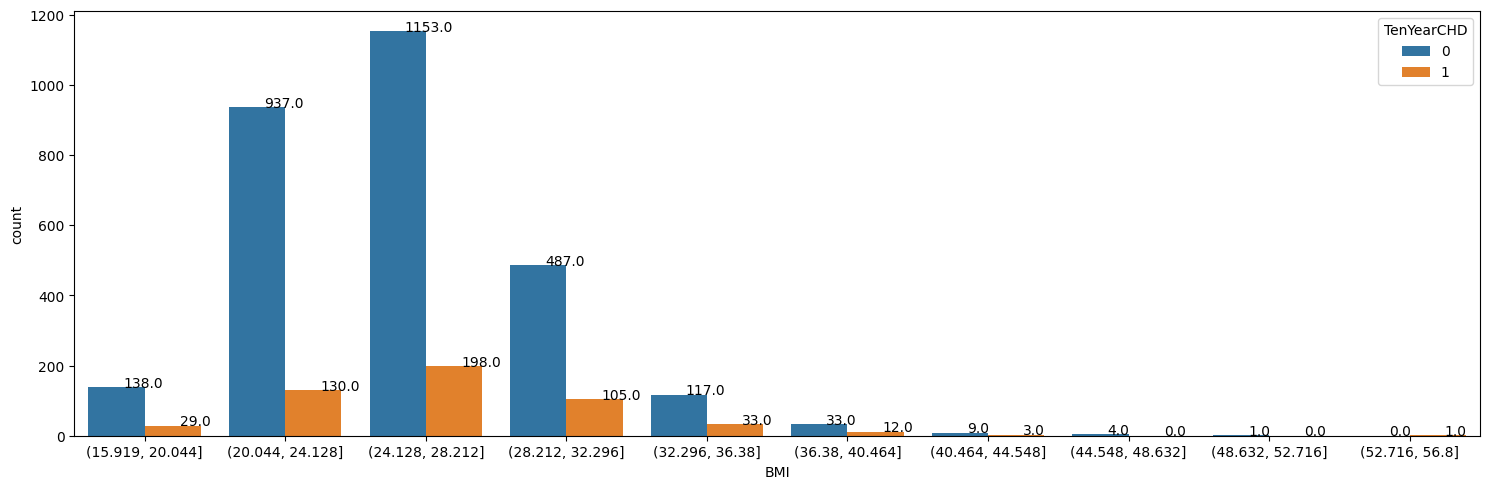

In [67]:
# Chart - 6 visualization code

# Analysing the  dataset

f, plot_6 = plt.subplots(figsize=(15, 5))
plt.rcParams["figure.autolayout"] = True

plot_6 = sns.countplot(data=newdf, x=pd.cut(newdf['BMI'], 10), hue='TenYearCHD')

for p in plot_6.patches:
   plot_6.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

- Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

- Poor BMI ratio is directly affecting heath of patience

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Though people with poor BMI ratio are relatively higher at risk of having coronary heart diseases,but we saw that even patience with good BMI ratio are at risk.So BMI alone can't be the factore.
- Lets try to find other factors as well.

#### Chart - 7 -  Affect of sugar levels over coronary heart disese.

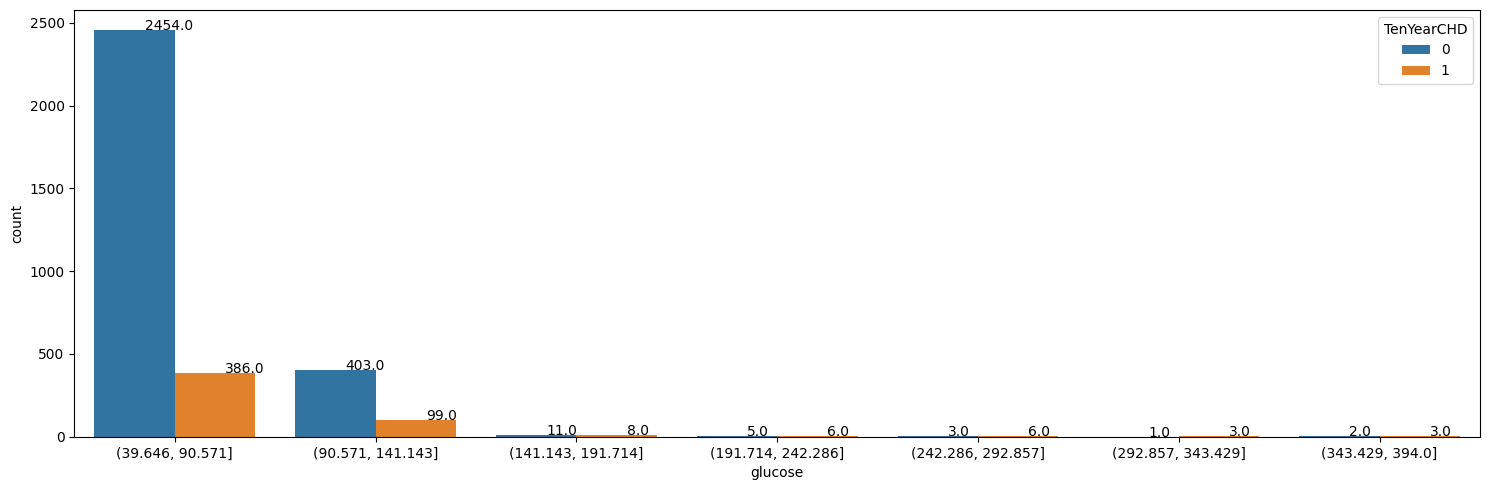

In [22]:
# Chart - 7 visualization code

# Analysing the  dataset
f, plot_7 = plt.subplots(figsize=(15, 5))
plt.rcParams["figure.autolayout"] = True

plot_7 = sns.countplot(data=newdf, x=pd.cut(newdf['glucose'], 7), hue='TenYearCHD')

for p in plot_7.patches:
   plot_7.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

- Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

- It is notable here that patients with high sugar levels are more prone to coronary heart diseases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

-  If people having high sugar level are more affected by diseases,it clearly means patients having dibatese are certainly more prone to cardiovascular heart diseases.Lets find that out too.

#### Chart - 8 - Affect of diabetes



diabetes  TenYearCHD
0         0             2825
          1              478
1         0               54
          1               33
dtype: int64


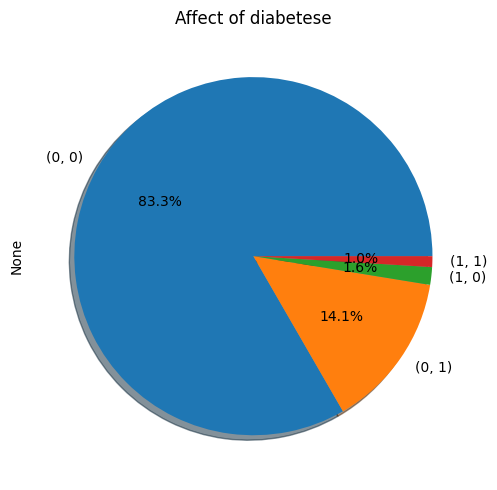

In [27]:
# Chart - 8 visualization code

#Count of each store type
plot_8 = newdf.groupby(['diabetes', 'TenYearCHD']).size()
print(plot_8)

#Visualizing using pie chart
plot_8.plot.pie(title='Affect of diabetese', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()


##### 1. Why did you pick the specific chart?

- A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

- Around 40% of people who have sugar have suffered heart stroke.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Since high level of sugar causes heart diseases, and as we know high sugar causes diabetese and as we saw in previous analysis that people with diabetese are more prone to heart attacks,so its quite clear that hear attack increases the chances of coronary heart diseases in a patient.
- Lets try to find that direct relation between heart stroke and coronary heart diseases.

#### Chart - 9 - Affect of heart stroke.

prevalentStroke  TenYearCHD
0                0             2867
                 1              501
1                0               12
                 1               10
dtype: int64


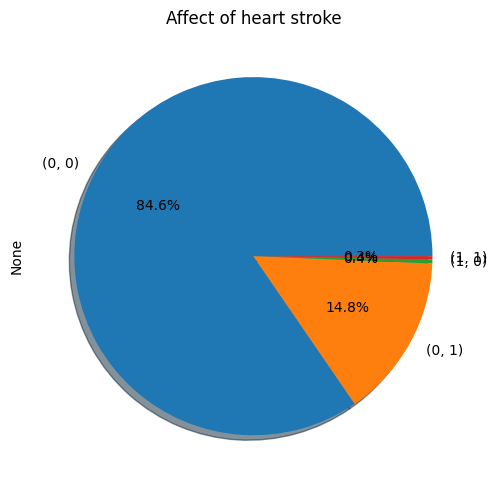

In [29]:
# Chart - 9 visualization code

#Count of each store type
plot_9 = newdf.groupby(['prevalentStroke', 'TenYearCHD']).size()
print(plot_9)

#Visualizing using pie chart
plot_9.plot.pie(title='Affect of heart stroke', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

- A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

- Around 50% of patients already suffered heart stroke are affected by colonary hear diseases

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- As its proven that people who have suffered heart strokes are more prone to coronary heart diseases.And its known that heart stroke is majorly caused because of high blood pressure.
- Lets try to find relation here too.

#### Chart - 10 -  Does high blood pressure causes heart stroke.

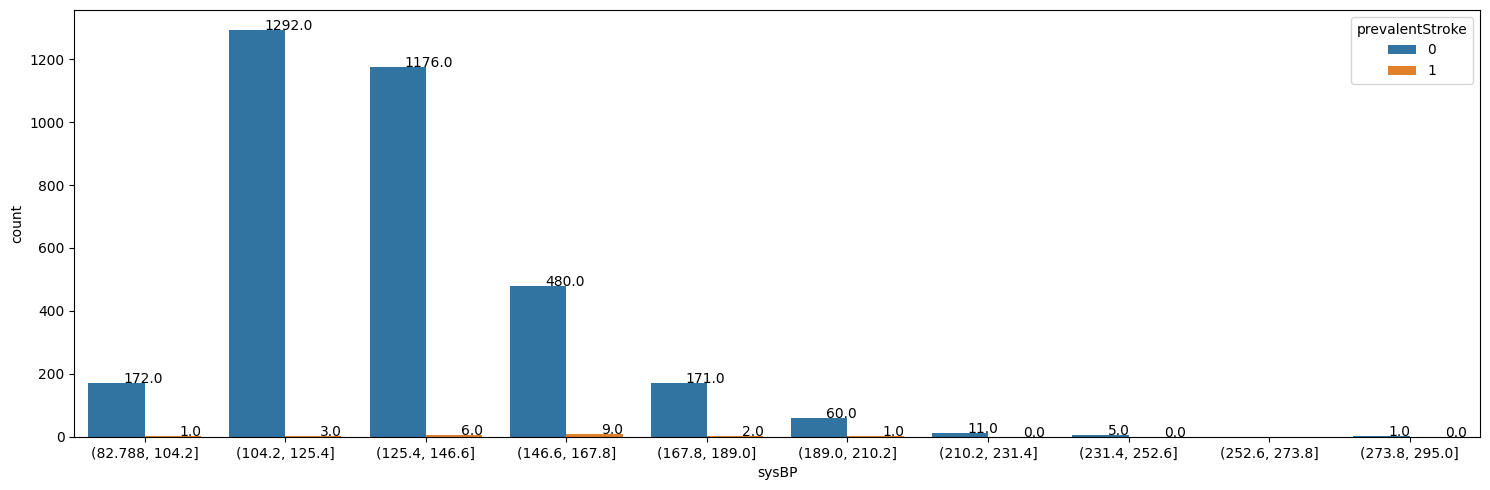

In [30]:
# Chart - 10 visualization code

# Analysing the  dataset
f, plot_10 = plt.subplots(figsize=(15, 5))
plt.rcParams["figure.autolayout"] = True

plot_10 = sns.countplot(data=newdf, x=pd.cut(newdf['sysBP'], 10), hue='prevalentStroke')

for p in plot_10.patches:
   plot_10.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

- Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

- Normal high side of blood pressure in around 120mm Hg,and we can clearly see patients having  blood pressure over this range have got heart stroke.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- We can clearly say that as high blood pressure increases the chance of heart attack,and heart stroke cleary means coronary heart disease it means if a patient has high high blood pressure there is a great chance that patient is suffering from coronary heart diseases.

#### Chart - 11 - Relation between high blood pressure and hypertension

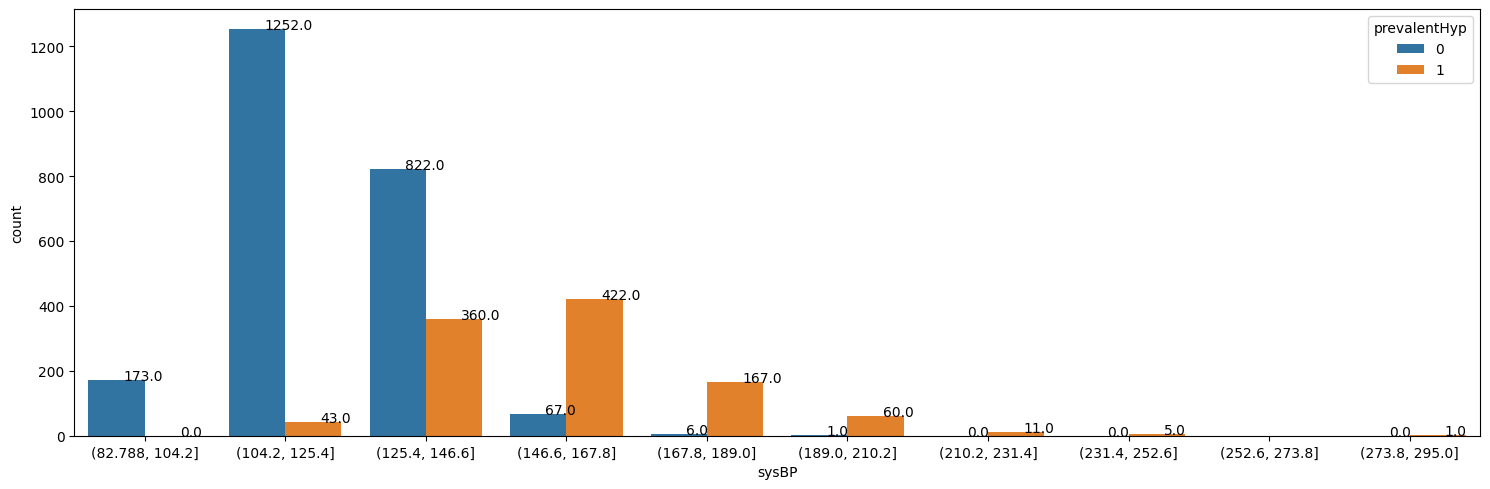

In [31]:
# Chart - 11 visualization code


f, plot_11 = plt.subplots(figsize=(15, 5))
plt.rcParams["figure.autolayout"] = True

plot_11 = sns.countplot(data=newdf, x=pd.cut(newdf['sysBP'], 10), hue='prevalentHyp')

for p in plot_11.patches:
   plot_11.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

- Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

- Patients who have high blood pressure suffer from hypertension.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- We can clearly find that hypertension is the result of high blood pressure,which leads to stroke and indicates the presence of some kind of coronary heart disease.
- Lets find if hypertension causes coronary heart diseases.

#### Chart - 12 - Affect of hypertension.

prevalentHyp  TenYearCHD
0             0             2065
              1              256
1             0              814
              1              255
dtype: int64


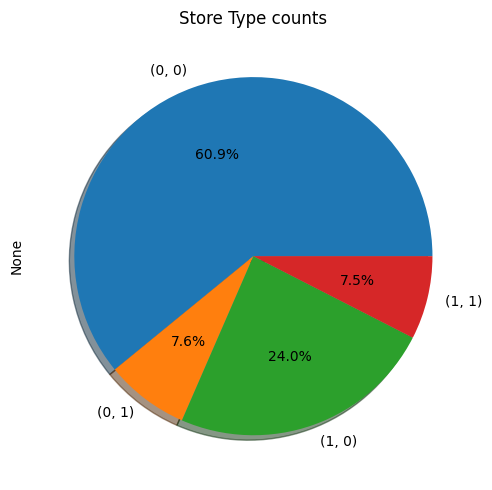

In [33]:
# Chart - 12 visualization code
# Analysing the dataset

plot_12 = newdf.groupby(['prevalentHyp', 'TenYearCHD']).size()
print(plot_12)

#Visualizing using pie chart
plot_12.plot.pie(title='Store Type counts', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

- A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

- Around 23% of patients have some kind of coronary heart disease who are suffering from hypertension.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Hypertension clearly leads to coronary heart diseases.Does taking bp medicines decreases the chances of coronary heart diseases,lets find out.

#### Chart - 13 - Affect of BP meds.

BPMeds  TenYearCHD
0       0             2812
        1              478
1       0               67
        1               33
dtype: int64


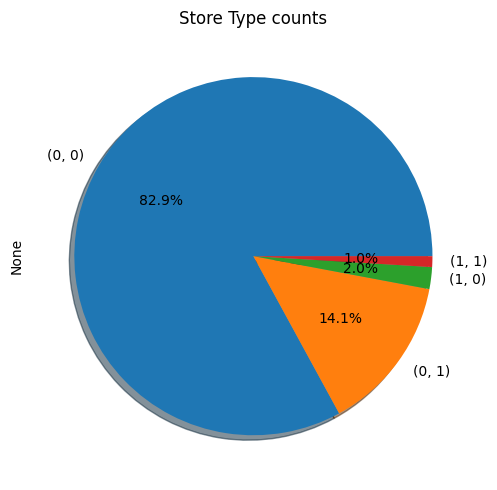

In [35]:
# Chart - 13 visualization code
# Analysing the dataset

plot_13 = newdf.groupby(['BPMeds', 'TenYearCHD']).size()
print(plot_13)

#Visualizing using pie chart
plot_13.plot.pie(title='Store Type counts', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

- A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

- Bp medicines are not affective in preventing coronary heart diseases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Only living healthy life style can protect from any type of coronary heart disease.Medicines have their own very limited affect.

#### Chart - 14 - Correlation Heatmap

<Axes: >

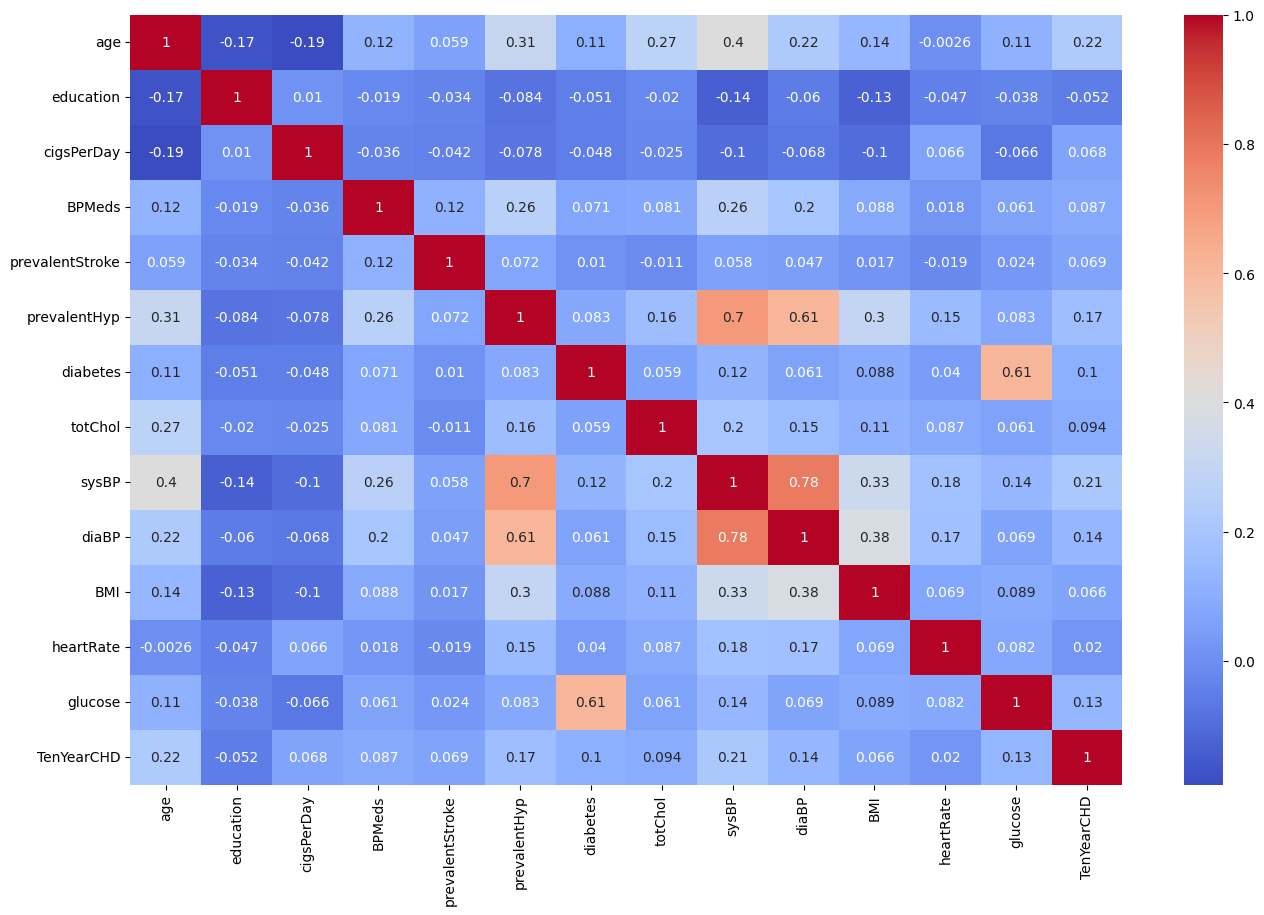

In [74]:
# Correlation Heatmap visualization code

#Checking relation between  features using correlation heatmap

plt.figure(figsize=(16,10))
sns.heatmap(newdf.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

- Correlation heatmaps is used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots helps to identify outliers and to detect linear and nonlinear relationships as well.

##### 2. What is/are the insight(s) found from the chart?

- None of the independent variables are showing any close relation with dependent variable 'TenYearCHD'
- 'Glucose is highly correlated with 'diabetese', which means high glucose level leads to diabetese in a patient.
- Hypertension is directly correlated with blood pressure,which means high blood pressure leads to hypertension.
- There is a lean relation between BMI and blood pressure,which means high blood pressure may be the result of high BMI of a patient.

#### Chart - 15 - Pair Plot 

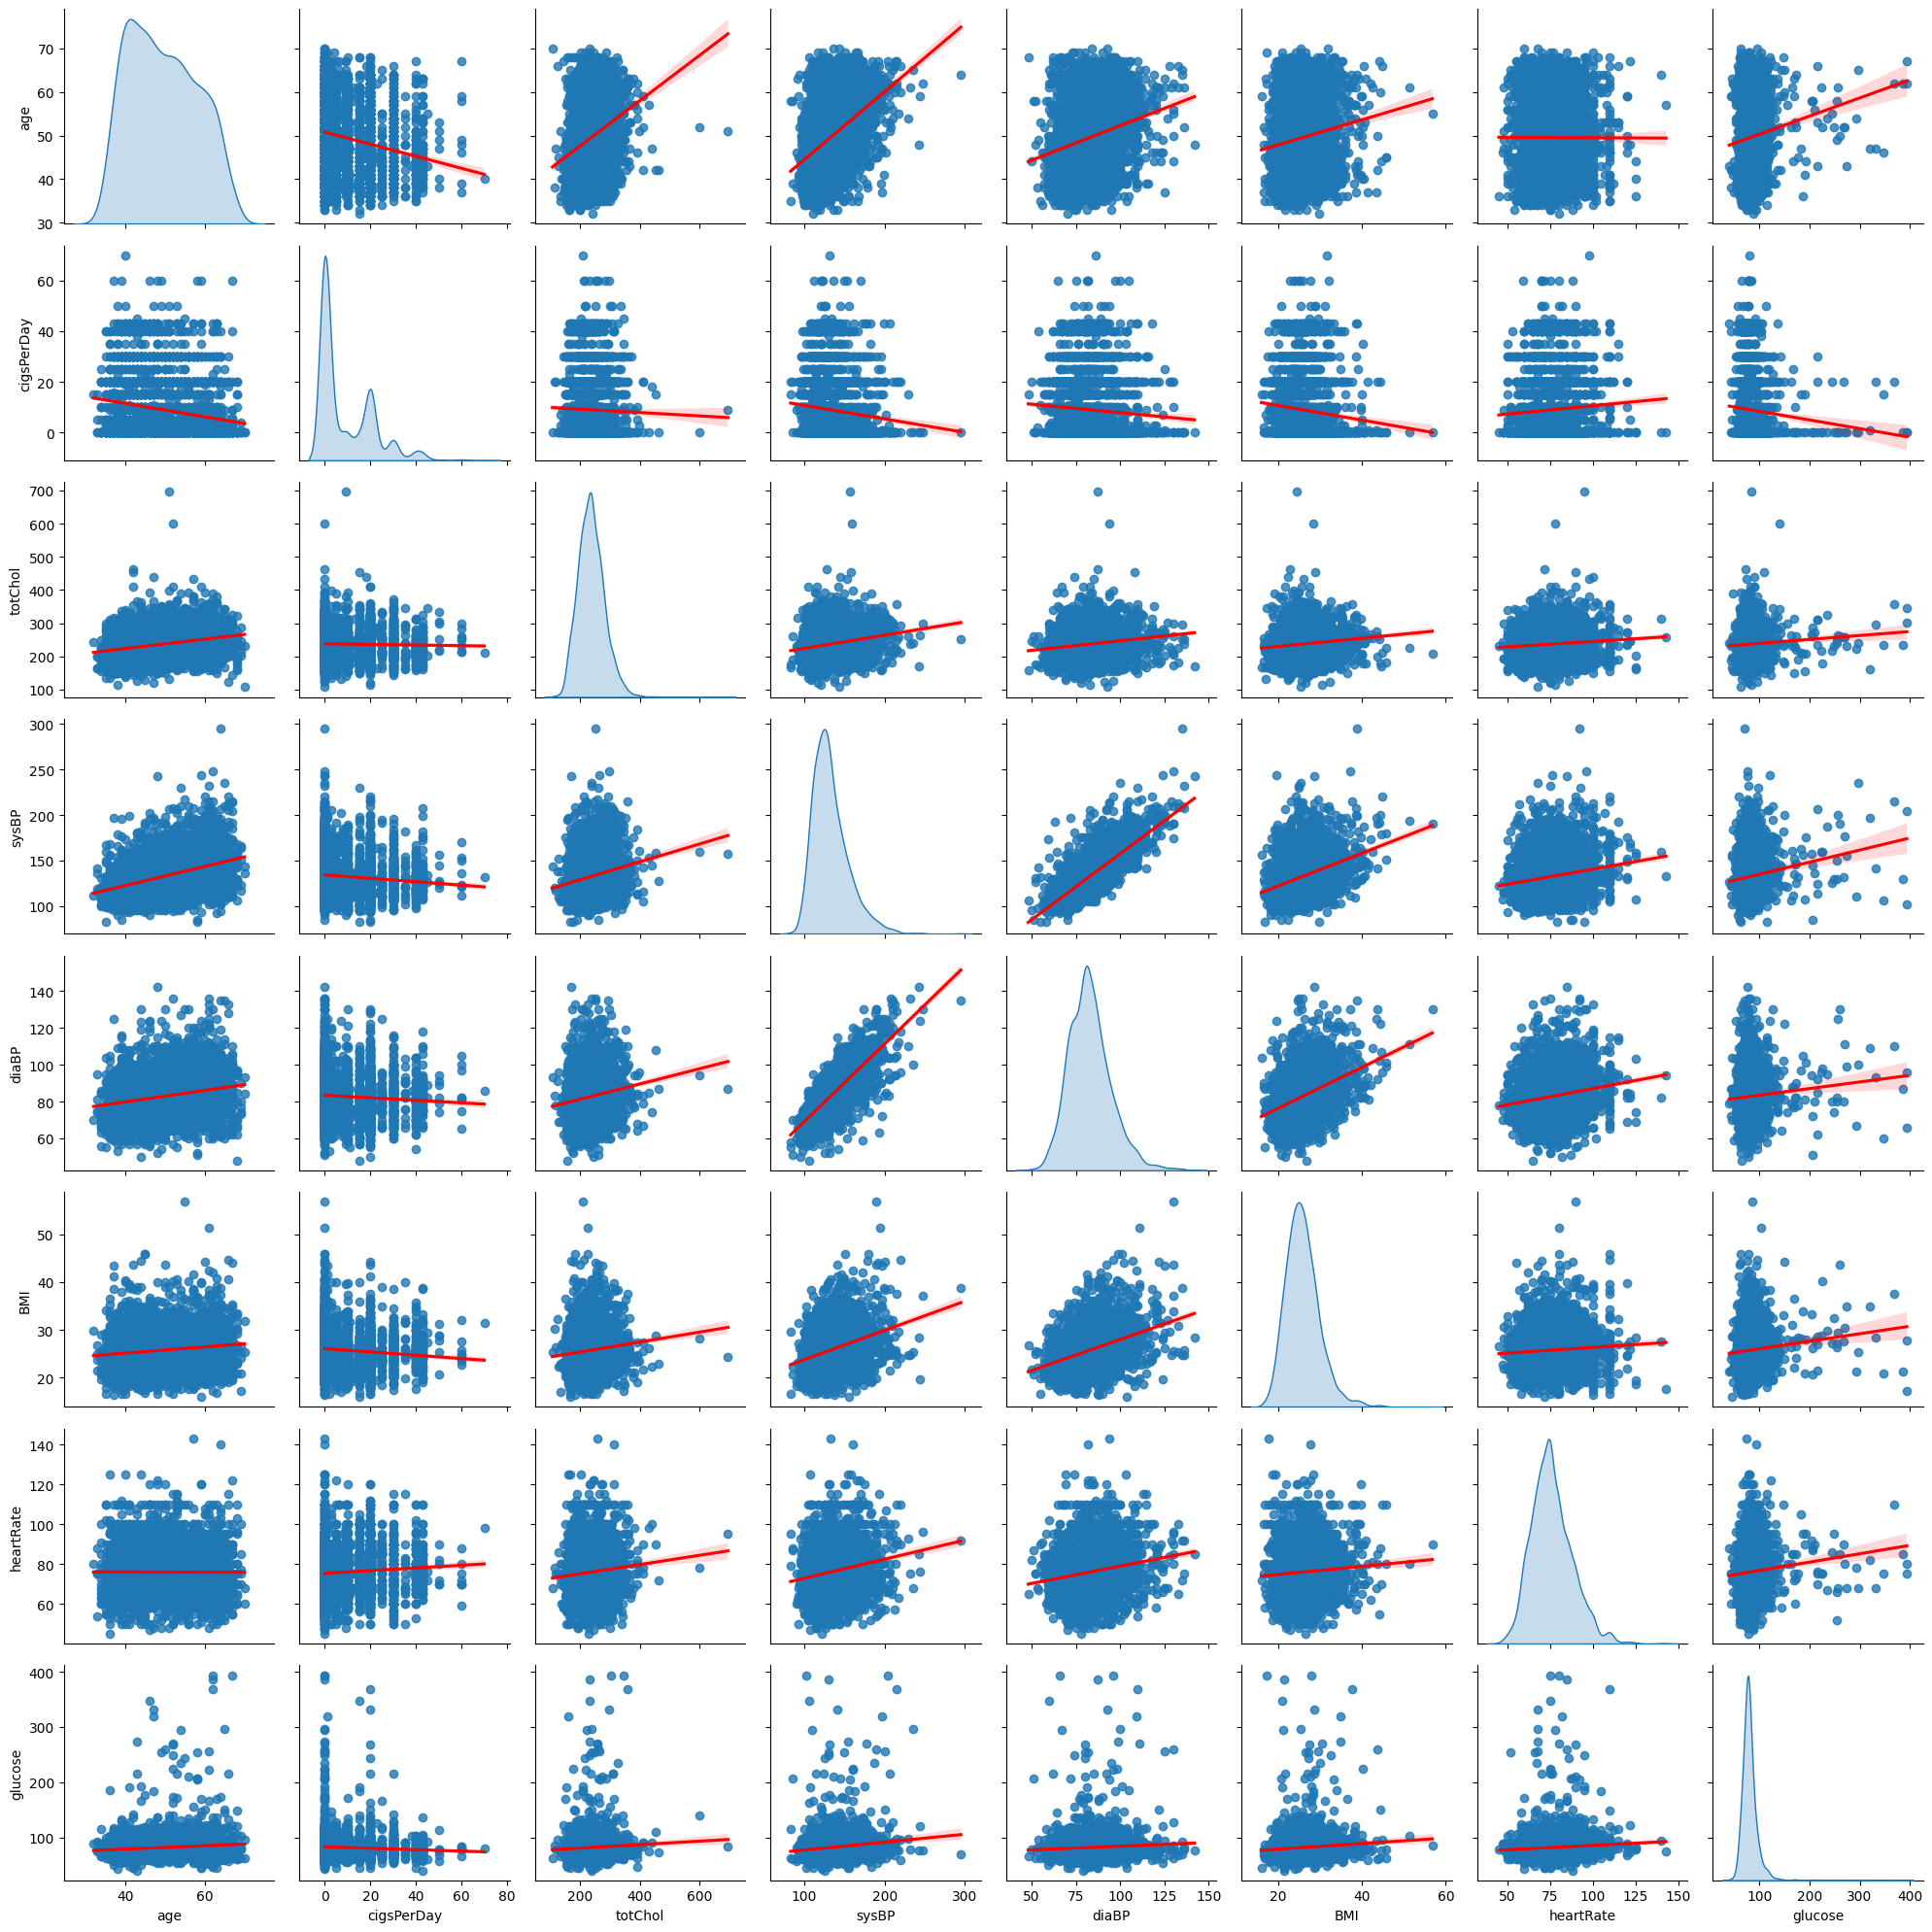

In [36]:
# Pair Plot visualization code
cols_to_plot = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP','BMI','heartRate','glucose']
# sns.pairplot(newdf, hue='TenYearCHD')
# Use plot_kws to change regression line colour
sns.pairplot(newdf[cols_to_plot], kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})

##### 1. Why did you pick the specific chart?

- Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it.

##### 2. What is/are the insight(s) found from the chart?

- Data is clearly showing strong linear relation among variables.
- There are few outliers as well.
- Data is bit skewed in'cigsPerDay' variable,which need to be treated.